# Using the `py-mie` library


Below is a very quick, hacked together jupyter notebook that details how to use the `py-mie` python library to make basic Mie calculations for homogeneous and heterogeneous particles.

There are just three functions available in the library:

  * `bhmie_scatter`
  * `core_shell_scatter`
  * `integrate_mode`

In [1]:
import mie

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

rc = {
    "figure.figsize": (12,6),
    "xtick.major.size": 12.0,
    "xtick.minor.size": 8.0,
    "ytick.major.size": 12.0,
    "ytick.minor.size": 8.0,
    "axes.linewidth": 1.75,
    "xtick.color": '0',
    "ytick.color": '0',
    "axes.labelcolor": '0'
}

sns.set("notebook", style="ticks", palette='deep', rc=rc, font_scale=1.75)

%matplotlib inline

## `mie.bhmie_scatter(particle_radius, radiation_lambda, n_particle)`

The `bhmie_scatter` function computes the scattering/absoprtion efficiency and assymetry parameter for a homogeneous particle.

The function has three parameters:

  * `particle_radius`: total particle radius (core and shell) in microns
      
  * `radiation_lambda`: wavelength of the incident light in microns
  * `n_particle`: complex refractive index of the particle material
  
The function returns three floats:

  * $Q_{sca}$: Scattering efficiency
  * $Q_{abs}$: Absoprtion efficiency
  * $asym$: assymetry parameter for the specified particle

### Example: Scattering and Absorption by Homogeneous Black Carbon

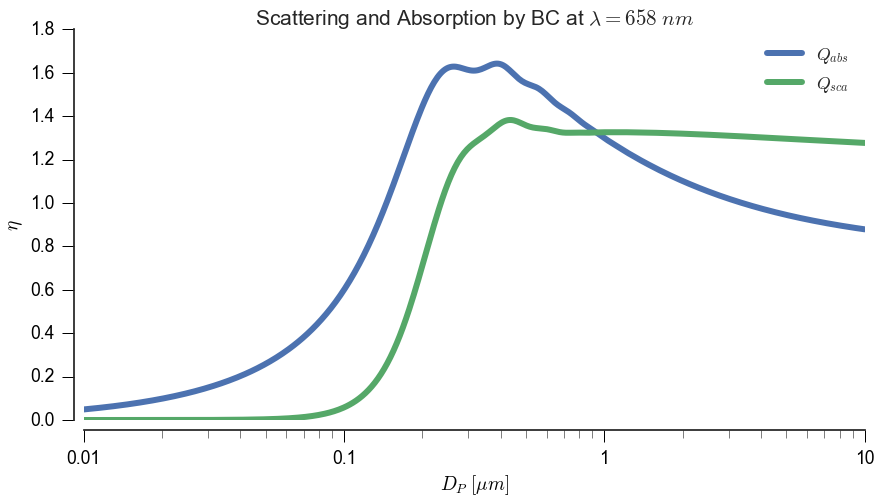

In [2]:
# Define the complex refractive index for Black Carbon (Data from Sienfeld and Pandis)
refr_BC = 1.95 + 0.79*1j

# Define the wavelength of incident light (658 nm)
wl = 0.658

# Let's plot over a range of particle diameters
diams = np.logspace(-2, 1, 500)

res = {
    "Qabs": np.zeros(len(diams)),
    "Qsca": np.zeros(len(diams)),
}

for i, dp in enumerate(diams):
    qsca, qabs, _ = mie.bhmie_scatter(
                                particle_radius=dp/2.,
                                radiation_lambda=wl,
                                n_particle=refr_BC)
    
    res["Qabs"][i] = qabs
    res["Qsca"][i] = qsca

# Plot
fig, ax = plt.subplots(1, figsize=(14,7))

ax.plot(diams, res["Qabs"], label="$Q_{abs}$", lw=6)
ax.plot(diams, res["Qsca"], label="$Q_{sca}$", lw=6)

ax.set_title("Scattering and Absorption by BC at $\lambda={:.0f}\;nm$".format(wl*1000))
ax.set_ylabel("$\eta$")
ax.set_xlabel("$D_P\;[\mu m]$")

ax.legend(loc='best')
ax.semilogx()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("%.3g"))

sns.despine(offset=10)

### Example: Scattering by Homogeneous Particles of Various Composition

Let's try plotting the scattering by various particles...

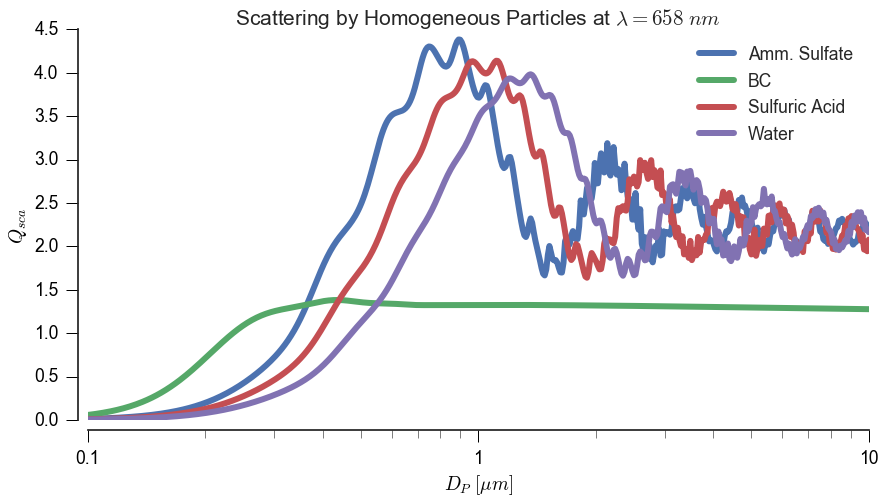

In [3]:
# Let's plot over a range of particle diameters
diams = np.logspace(-1, 1, 500)

particles = []

particles.append(("Amm. Sulfate", 1.521 + 0*1j))   # PubChem (589nm)
particles.append(("BC", 1.95 + 0.79*1j))
particles.append(("Sulfuric Acid", 1.4183 + 0*1j)) # CRC (589nm)
particles.append(("Water", 1.331 + 1.64e-8*1j))    # S+P T15.1 (650nm)

fig, ax = plt.subplots(1, figsize=(14,7))

for each in particles:
    res = []
    for i, dp in enumerate(diams):
        qsca, _, _ = mie.bhmie_scatter(dp/2., wl, each[1])
        
        res.append(qsca)

    ax.plot(diams, res, label=each[0], lw=6)
    
ax.set_title("Scattering by Homogeneous Particles at $\lambda={:.0f}\;nm$".format(wl*1000))
ax.set_ylabel("$Q_{sca}$")
ax.set_xlabel("$D_P\;[\mu m]$")

ax.legend(loc='best')
ax.semilogx()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("%.3g"))

sns.despine(offset=10)

## `mie.core_shell_scatter(particle_radius, core_fraction, radiation_lambda, n_shell, n_particle)`

The `core_shell_scatter` function computes the scattering/absoprtion efficiency and assymetry parameter for a heterogeneous, core-shell mixed particle.

The function has five parameters:

  * `particle_radius`: total particle radius (core and shell) in microns
  * `core_fraction`: the fraction of the particle comprised by it's core (0.0-1.0)
  * `radiation_lambda`: wavelength of the incident light in microns
  * `n_core`: complex refractive index of the particle core material
  * `n_shell`: complex refractive index of the particle shell material
  
The function returns three floats:

  * $Q_{sca}$: Scattering efficiency
  * $Q_{abs}$: Absoprtion efficiency
  * $asym$: assymetry parameter for the specified particle

### Example: Scattering and Absorption by BC Coated with SO4

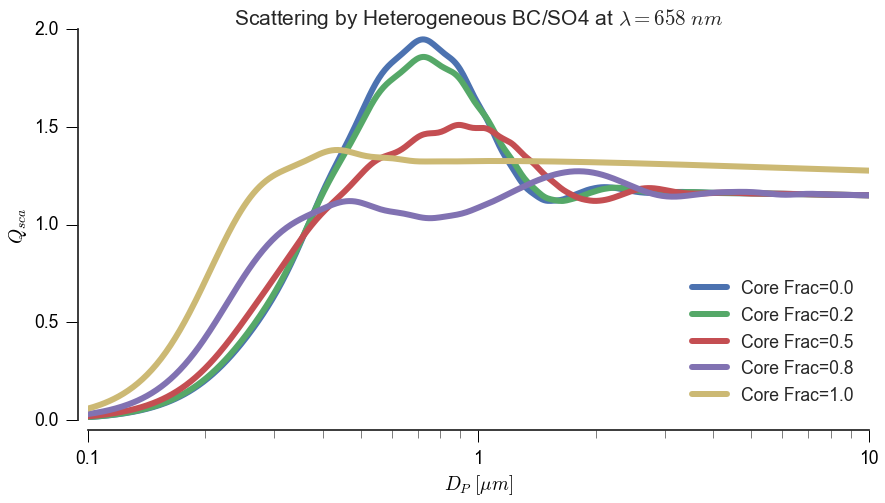

In [4]:
core_frac = np.linspace(0.0, 1.0, 5)

refr_SO4 = [
    1.53+imag*1j for imag in \
        [0.158, 0.057, 0.003, 0.001, 0.001, 0.000, 0.000, 0.000, 
         0.000, 0.000, 0.000, 0.000, 0.000, 0.551]            
]

refr_BC = 1.95 + 0.79*1j

res = []

fig, ax = plt.subplots(1, figsize=(14,7))

for frac in core_frac:
    res = []
    for dp in diams:
        qsca, qabs, _ = mie.core_shell_scatter(
                                particle_radius=dp/2.,
                                core_fraction=frac,
                                radiation_lambda=wl,
                                n_core=refr_BC,
                                n_shell=refr_SO4
                                ) 
        res.append(qsca)
        
    ax.plot(diams, res, label="Core Frac={:.1f}".format(frac), lw=6)

ax.set_title("Scattering by Heterogeneous BC/SO4 at $\lambda={:.0f}\;nm$".format(wl*1000))
ax.set_ylabel("$Q_{sca}$")
ax.set_xlabel("$D_P\;[\mu m]$")

ax.legend(loc='best')
ax.semilogx()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("%.3g"))

sns.despine(offset=10)

## `mie.integrate_mode(core_fraction, n_shell, n_core, radiation_lambda, mode_radius, mode_sigma, r_min=1e-3, r_max=100., nr=200)`

The `integrate_mode` function integrates the Mie theory calculation over a lognormal aerosol mode with homogeneous particle properties, weighting by its size distribution.

The function has six required parameters:

  * `core_fraction`: the fraction of the particle comprised by it's core (0.0-1.0)
  * `n_core`: complex refractive index of the particle core material
  * `n_shell`: complex refractive index of the particle shell material
  * `radiation_lambda`: wavelength of the incident light in microns
  * `mode_radius`: the geometric mean or mode radius of the aerosol size distribution in microns
  * `mode_sigma`: the geometric standard deviation of the aerosol size distribution
  
The function also has three optional parameters:

  * `r_min`: the minimum radius to integrate over
  * `r_max`: the maximum radius to integrate over
  * `nr`: the number of particle radii to use in the integration
  
The function returns three floats:

  * $Q_{sca}$: Scattering efficiency
  * $Q_{abs}$: Absoprtion efficiency
  * $asym$: assymetry parameter for the specified particle

### Example: Scattering of Ammonium Sulfate at 658 nm for Various Size Distributions

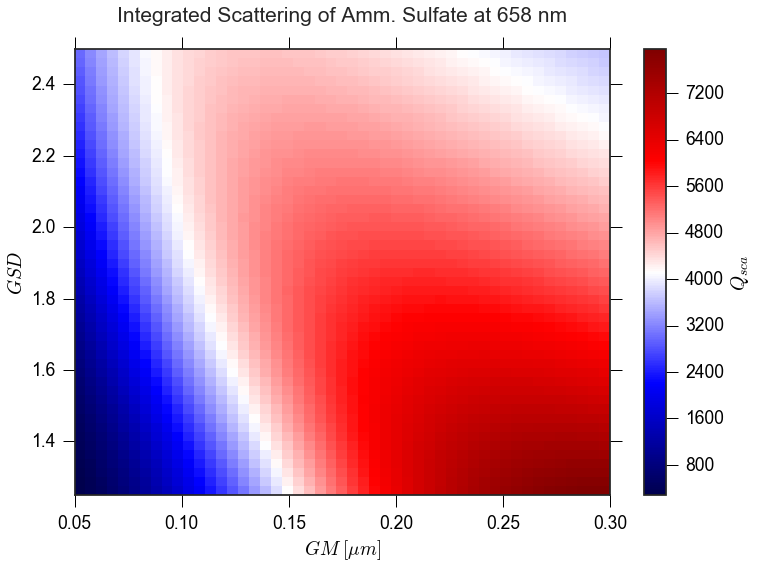

In [5]:
refr_ammsulf = 1.521 + 0*1j

# Range of Geo. Means
gm_range = np.linspace(0.05, 0.3, 50)

# Range of Geo. Standard Deviations
gsd_range = np.linspace(1.25, 2.5, 50)

val_matrix = np.zeros((len(gm_range), len(gsd_range))) * np.nan

for i, gm in enumerate(gm_range):
    for j, gsd in enumerate(gsd_range):
        qsca, qabs, _ = mie.integrate_mode(
                                core_fraction=1,
                                n_shell=refr_BC,
                                n_core=refr_ammsulf,
                                radiation_lambda=wl,
                                mode_radius=gm,
                                mode_sigma=gsd
                                )
        val_matrix[i][j] = qsca
        
# Plot the results
fig, ax = plt.subplots(1, figsize=(12,8))

im = plt.pcolormesh(gm_range, gsd_range, val_matrix.T, cmap="seismic")

ax.set_xlabel("$GM\;[\mu m]$")
ax.set_ylabel("$GSD$")
ax.set_title("Integrated Scattering of Amm. Sulfate at 658 nm", y=1.05)

ax.set_ylim([gsd_range.min(), gsd_range.max()])

plt.colorbar(im, label="$Q_{sca}$")

plt.show()